# Part 3 Exploratory Analysis
We explore house attributes in Austin market and it will help users undertand about the market so they can make best decision when choosing the houses.

1. Investigate new features 
    *  **pricepersqft** from soldprice/sqft
    *  **day/month/year** from solddate
2. Investigate categorical variables has too many levels.
    * Reduce levels by grouping similar levels (ex.heating/cooling/parking types)


## Summary
* Prices:
   * Prices mostly below ~\\$500k whereas Price/sqft are mostly below ~$200/sqft
   * Houses with west zipcode are more expensive then east.
* Sold quantity:
   * A huge decline in house-sold quantity in 2019 than earlier years
   * More houses sold in summmer than winter
* Bedrooms & bathrooms
   * Most houses with 3 or 4 bedrooms and 2 to 4 bathrooms. The number is proportional to sold price
* House/lot size:
   * Most houses are less than 5000 sqft and house size is proportional to price
   * Most lot size is less than 10k sqft but not proportional to price
* House age: 
   * Less houses were built during 2008~2012 and more house built since 2016
   * New houses built after 2010 are more expensive
* Heating&Cooling:
   * Most houses use Forced Air for heating and Central Cooling
* Parking:
   * Most houses have 1 to 3 parking spaces

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)

In [2]:
df=pd.read_csv("df_clean.csv")
df.shape

(5308, 18)

In [3]:
df["pricepersqft"]=df["soldprice"]/df["sqft"]

df["date"]=pd.to_datetime(df['solddate'],format='%m/%d/%Y')
df["day"]=[i.day for i in df["date"]]
df["month"]=[i.month for i in df["date"]]
df["year"]=[i.year for i in df["date"]]
print("Data from {} to {}".format(df.date.min(),df.date.max()))


Data from 2016-06-17 00:00:00 to 2019-06-14 00:00:00


In [4]:
df.head(3)

,beds,baths,sqft,solddate,soldprice,housetype,YearBuilt,Heating,Cooling,parking,name,streetAddress,addressLocality,addressRegion,postalCode,latitude,longitude,lotsize1,pricepersqft,date,day,month,year
0,3.0,2.0,1478.0,4/22/2019,224778.0,Single Family,2000,Other,Central,2,"702 Le Ann Ln, Cedar Park, TX 78613",702 Le Ann Ln,Cedar Park,TX,78613,30.518779,-97.817411,5662.0,152.082544,2019-04-22,22,4,2019
1,4.0,2.5,2665.0,4/12/2019,250000.0,Single Family,2000,Forced air,Central,1,"2605 Byfield Dr, Cedar Park, TX 78613",2605 Byfield Dr,Cedar Park,TX,78613,30.540536,-97.845924,8276.0,93.808630,2019-04-12,12,4,2019
2,3.0,3.0,2255.0,4/5/2019,269000.0,Single Family,2000,"Forced air, Other",Central,2,"1622 Abbey Ln, Cedar Park, TX 78613",1622 Abbey Ln,Cedar Park,TX,78613,30.522559,-97.854897,7666.0,119.290466,2019-04-05,5,4,2019


# Price vs Price/Sqft

1. Both price and price/sqft are skewed to right due to few extremely high price values. We will need log transformation during modeling. 
2. Prices are mostly below ~\\$500k 
3. Price/sqft are mostly below ~\$200/sqft

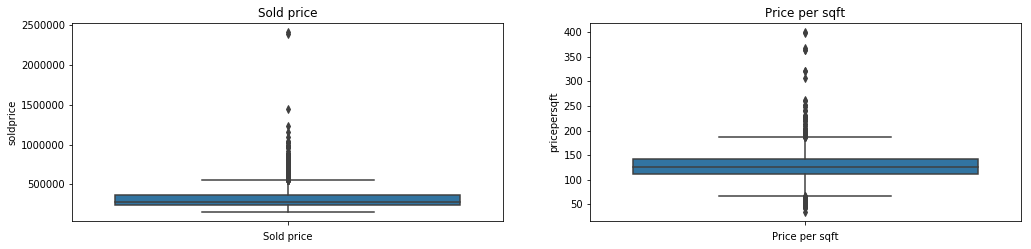

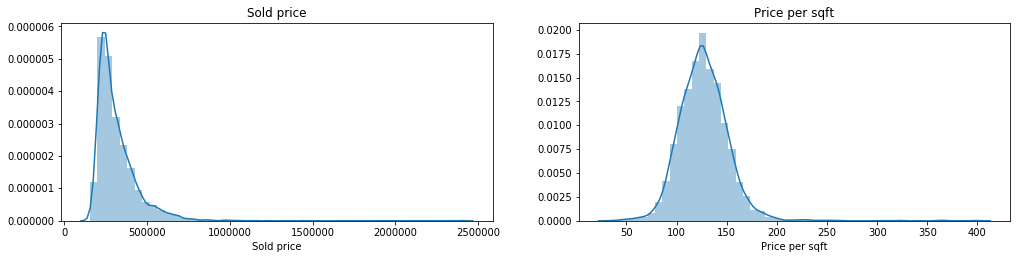

In [19]:
plt.figure(figsize=(17,8))
plt.subplot(2, 2, 1)
sns.boxplot(y=df.soldprice)
plt.title('Sold price')
plt.xlabel('Sold price');

plt.subplot(2, 2, 2)
sns.boxplot(y=df.pricepersqft)
plt.title('Price per sqft')
plt.xlabel('Price per sqft');

plt.figure(figsize=(17,8))
plt.subplot(2, 2, 3)
sns.distplot(df.soldprice)
plt.title('Sold price')
plt.xlabel('Sold price');

plt.subplot(2, 2, 4)
sns.distplot(df.pricepersqft)
plt.title('Price per sqft')
plt.xlabel('Price per sqft');


# Price vs Zipcode&Year
78613 and 78641 in west region. 78660 and 78664 are in east region. 
1. Houses in 78613 and 78641 are more expensive among 4 regions.
2. Houses in 78613 also and 78641 are the highest and 2nd highest in price/sqft 
3. All 4 regions show quate stable price/sqft since 2016, 78660 seems to be increasing

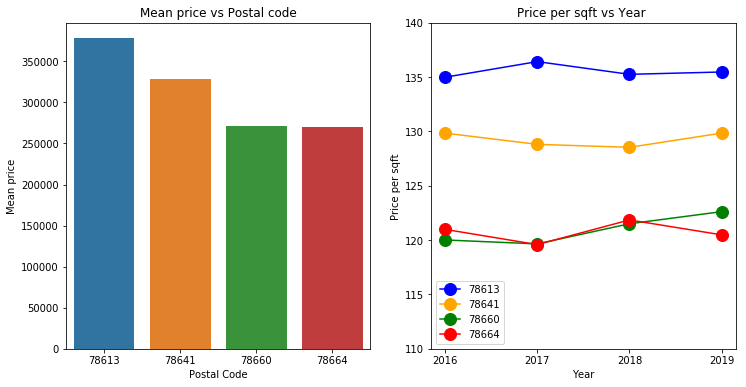

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
pos_prices=df.groupby(["postalCode"]).agg({"soldprice":np.mean})
sns.barplot(pos_prices.index,pos_prices.soldprice)
plt.title('Mean price vs Postal code')
plt.xlabel('Postal Code')
plt.ylabel('Mean price');


plt.subplot(1, 2, 2)
ypp=pd.DataFrame(df.groupby(["year","postalCode"]).agg({"pricepersqft":np.mean}))
ypp=ypp.pivot_table(values="pricepersqft",index="year",columns="postalCode")
plt.plot(ypp.index,ypp[78613], marker='o', markersize=12, color='blue', label="78613")
plt.plot(ypp.index,ypp[78641], marker='o', markersize=12, color='orange', label="78641")
plt.plot(ypp.index,ypp[78660], marker='o', markersize=12, color="green", label="78660")
plt.plot(ypp.index,ypp[78664], marker='o', markersize=12, color='red', label="78664")
plt.legend(loc=3)
plt.ylim((110,140))
plt.xticks(ypp.index,ypp.index)
plt.title('Price per sqft vs Year ')
plt.xlabel('Year')
plt.ylabel('Price per sqft');


# Sold house quantity 
Note: Sold house quantity in 2016 and 2019 only included 2nd and 1st half of the year, respectively.
1. There are more houses sold 2016 and 2017. Houses sold in 2019 seems much less than earlier years. 
2. More houses sold in 78641, 78660 than the others.
3. More houses sold in summmer than winter

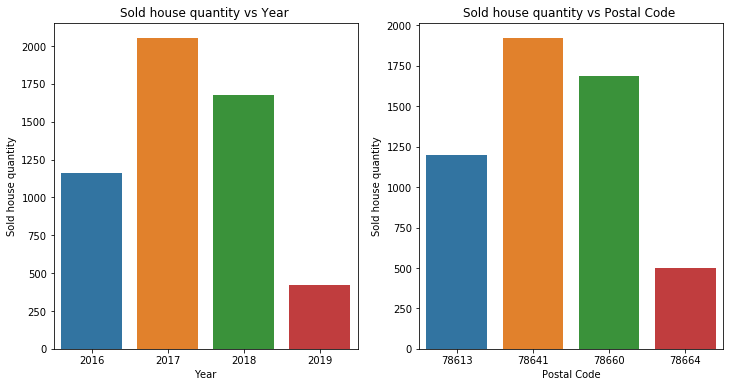

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sold_year=df.groupby(["year"])["year"].count()
sns.barplot(sold_year.index,sold_year.values)
plt.title('Sold house quantity vs Year ')
plt.xlabel('Year')
plt.ylabel('Sold house quantity')

plt.subplot(1, 2, 2)
pos_houses=df.groupby(["postalCode"])["housetype"].count()
sns.barplot(pos_houses.index,pos_houses.values)
plt.title('Sold house quantity vs Postal Code ')
plt.xlabel('Postal Code')
plt.ylabel('Sold house quantity');

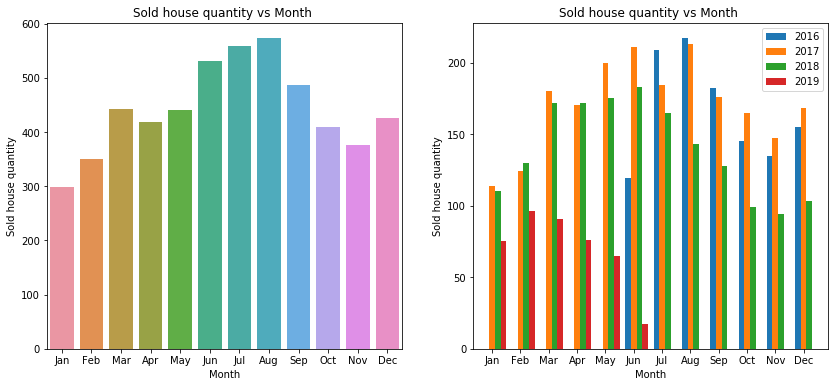

In [100]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sold_month=pd.DataFrame(df.groupby(["month"])["housetype"].count())
sns.barplot(sold_month.index,sold_month["housetype"])
plt.title('Sold house quantity vs Month ')
plt.xlabel('Month')
plt.xticks(sold_month.index-1,
           ['Jan', 'Feb', 'Mar', 'Apr', 'May',"Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.ylabel('Sold house quantity')



plt.subplot(1, 2, 2)
sold_monthyear=pd.DataFrame(df.groupby(["month","year"])["housetype"].count())
sold_month=pd.pivot_table(sold_monthyear, values='housetype', index=['month'], columns=['year'])

# Set position of bar on X axis
barWidth = 0.2
r1 = np.arange(len(sold_month.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# Make the plot
plt.bar(r1, sold_month[2016].values, width=barWidth, label='2016')
plt.bar(r2, sold_month[2017].values, width=barWidth, label='2017')
plt.bar(r3, sold_month[2018].values, width=barWidth, label='2018')
plt.bar(r4, sold_month[2019].values, width=barWidth, label='2019')
# Add xticks on the middle of the group bars
plt.xlabel('Month')
plt.ylabel('Sold house quantity')
plt.xticks([r + barWidth for r in range(len(sold_month.index))],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May',"Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title('Sold house quantity vs Month ')
plt.legend()
plt.show()


# Year built
1. Less houses were built during 2008~2012 due to recession
2. Lots of house built since 2016
3. New houses built after 2010 are more expensive

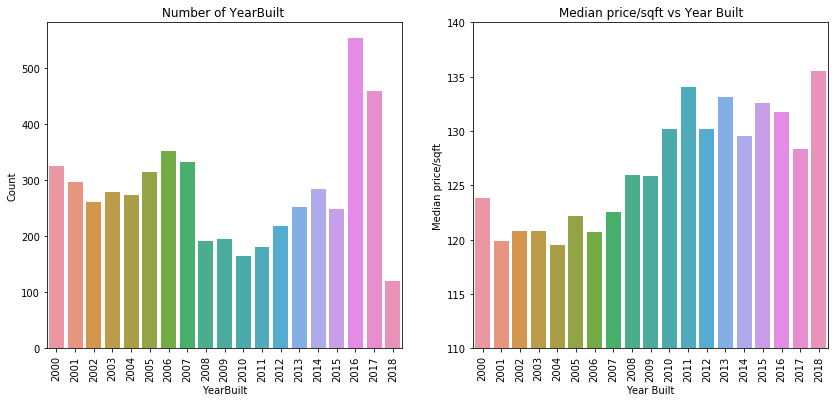

In [46]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(df.YearBuilt.value_counts().index,df.YearBuilt.value_counts().values)
plt.title('Number of YearBuilt ')
plt.xlabel('YearBuilt')
plt.xticks(rotation="vertical")
plt.ylabel('Count')

plt.subplot(1, 2, 2)

year_prices=df.groupby(["YearBuilt"]).agg({"pricepersqft":np.median})
sns.barplot(year_prices.index,year_prices.pricepersqft)
plt.title('Median price/sqft vs Year Built')
plt.xlabel('Year Built')
plt.xticks(rotation="vertical")
plt.ylabel('Median price/sqft')
plt.ylim((110,140));

# Bedrooms
1. Most houses sold with 3 or 4 bedrooms
2. Number of bedrooms is proportional to sold price

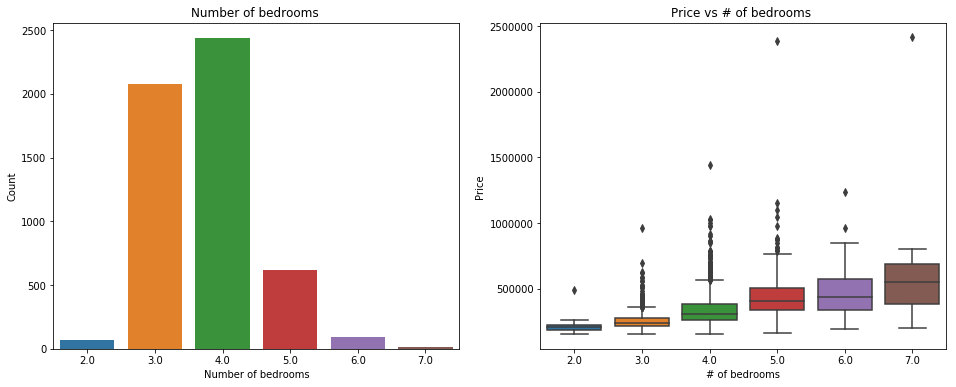

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.barplot(df.beds.value_counts().index,df.beds.value_counts().values)
plt.title('Number of bedrooms ')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(df.beds,df.soldprice)
plt.title('Price vs # of bedrooms ')
plt.xlabel('# of bedrooms')
plt.ylabel('Price');



# Bathrooms
1. Most houses sold with 2 to 4 bathrooms
2. Number of bathrooms is proportional to sold price

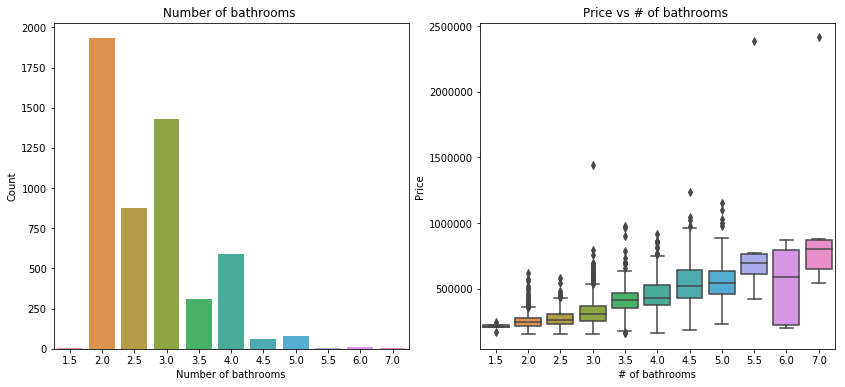

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(df.baths.value_counts().index,df.baths.value_counts().values)
plt.title('Number of bathrooms ')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

plt.subplot(1, 2, 2)

sns.boxplot(df.baths,df.soldprice)
plt.title('Price vs # of bathrooms ')
plt.xlabel('# of bathrooms')
plt.ylabel('Price');

# Price vs house/lot size
1. Most houses are less than 5000 sqft and house size is proportional to price
2. Most lot size is less than 10k sqft but not proportional to price

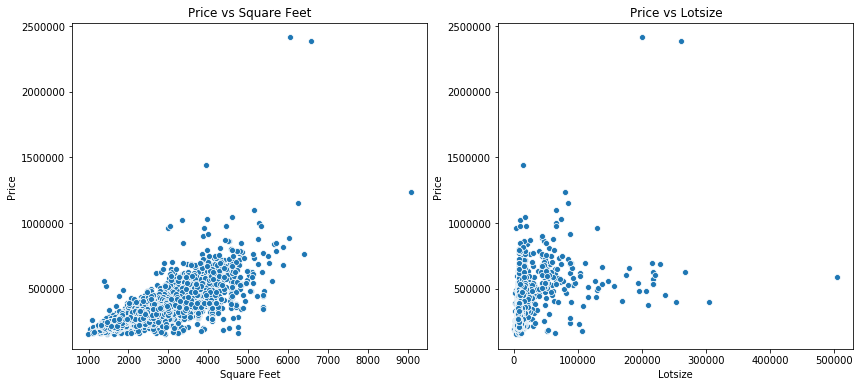

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)

sns.scatterplot(df.sqft,df.soldprice)
plt.title('Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(df.lotsize1,df.soldprice)
plt.title('Price vs Lotsize')
plt.xlabel('Lotsize')
plt.ylabel('Price');



# Heating
1. Most houses heating types are Force air or other
2. Grouped them with similar names to reduce levels

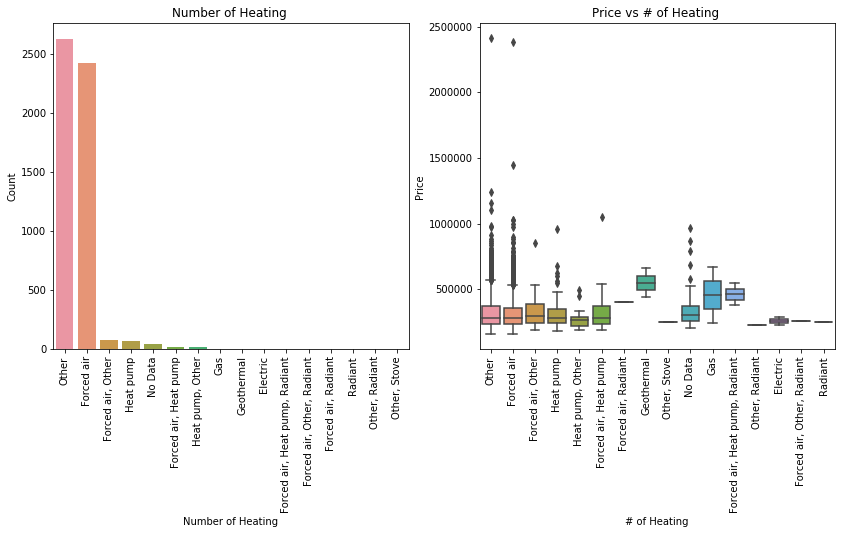

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(df.Heating.value_counts().index,df.Heating.value_counts().values)
plt.title('Number of Heating ')
plt.xlabel('Number of Heating')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(1, 2, 2)

sns.boxplot(df.Heating,df.soldprice)
plt.title('Price vs # of Heating ')
plt.xlabel('# of Heating')
plt.xticks(rotation='vertical')
plt.ylabel('Price');

In [68]:
heattype=df.Heating.value_counts().index

Forced=heattype[heattype.str.startswith("Forced")]
df.Heating[df.Heating.isin(Forced)]="Forced air"

Heat=heattype[heattype.str.startswith("Heat")]
df.Heating[df.Heating.isin(Heat)]="Heat pump"

few=df.Heating.value_counts().index[df.Heating.value_counts()<5]
df.Heating[df.Heating.isin(few)]="Other"

In [51]:
df.Heating.value_counts()

Other         2641
Forced air    2530
Heat pump       88
No Data         49
Name: Heating, dtype: int64

# Cooling
1. Most houses Cooling types are Central or No data
2. Grouped them with similar names to reduce levels

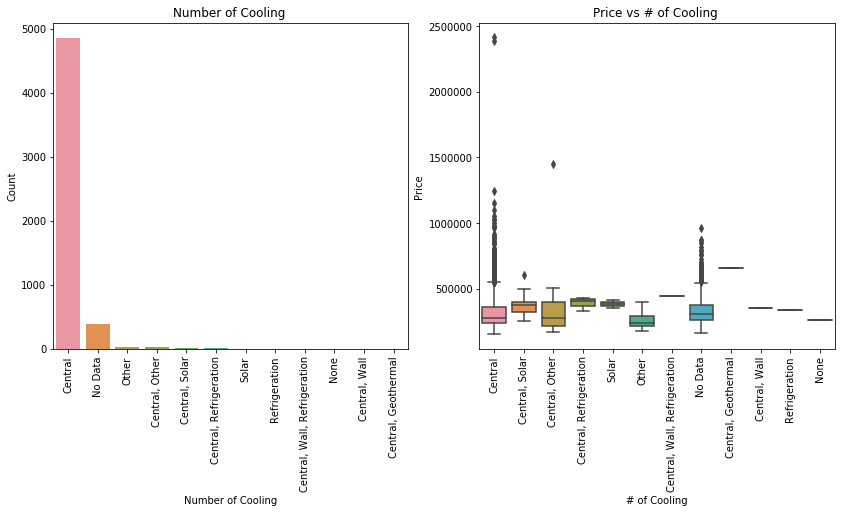

In [53]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(df.Cooling.value_counts().index,df.Cooling.value_counts().values)
plt.title('Number of Cooling ')
plt.xlabel('Number of Cooling')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(1, 2, 2)

sns.boxplot(df.Cooling,df.soldprice)
plt.title('Price vs # of Cooling ')
plt.xlabel('# of Cooling')
plt.xticks(rotation='vertical')
plt.ylabel('Price');

In [54]:
cooltype=df.Cooling.value_counts().index

Central=cooltype[cooltype.str.startswith("Central")]
df.Cooling[df.Cooling.isin(Central)]="Central"

few=df.Cooling.value_counts().index[df.Cooling.value_counts()<5]
df.Cooling[df.Cooling.isin(few)]="Other"

In [55]:
df.Cooling.value_counts()

Central    4893
No Data     378
Other        37
Name: Cooling, dtype: int64

# Parking
1. Most houses parking types are 1 to 3
2. Grouped them with similar names to reduce levels

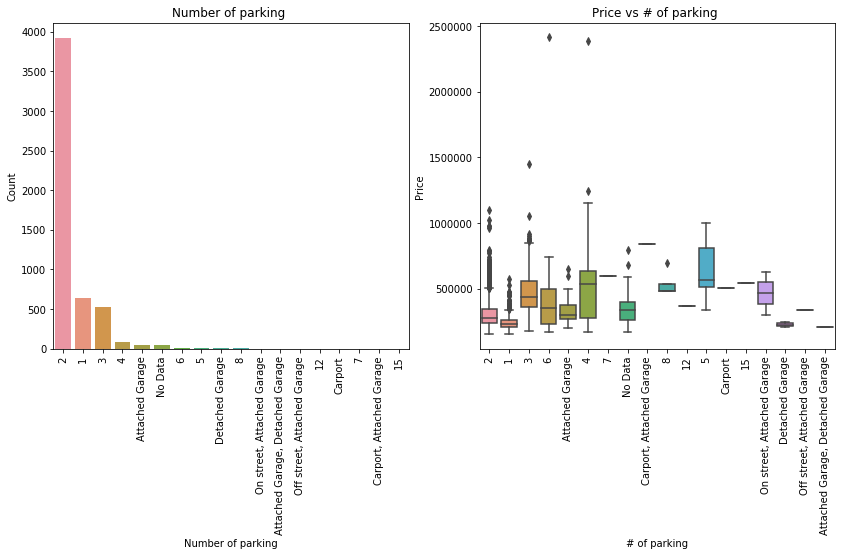

In [56]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.barplot(df.parking.value_counts().index,df.parking.value_counts().values)
plt.title('Number of parking ')
plt.xlabel('Number of parking')
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.subplot(1, 2, 2)

sns.boxplot(df.parking,df.soldprice)
plt.title('Price vs # of parking ')
plt.xlabel('# of parking')
plt.xticks(rotation='vertical')
plt.ylabel('Price');

In [60]:
df.parking[df.parking.isin(["4","5","6","7","8","12","15"])]="4+"
AttachedDetached =[i for i in df.parking.value_counts().index if re.search(".*Attached.*|.*Detached.*|.*Carport.*",i)]
df.parking[df.parking.isin(AttachedDetached)]="Attached-Detached-Carport"

In [61]:
df.parking.value_counts()

2                            3919
1                             643
3                             523
4+                            112
Attached-Detached-Carport      62
No Data                        49
Name: parking, dtype: int64

In [63]:
df.to_csv("df_visual.csv",index=False)